In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("USA_Housing.csv")

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


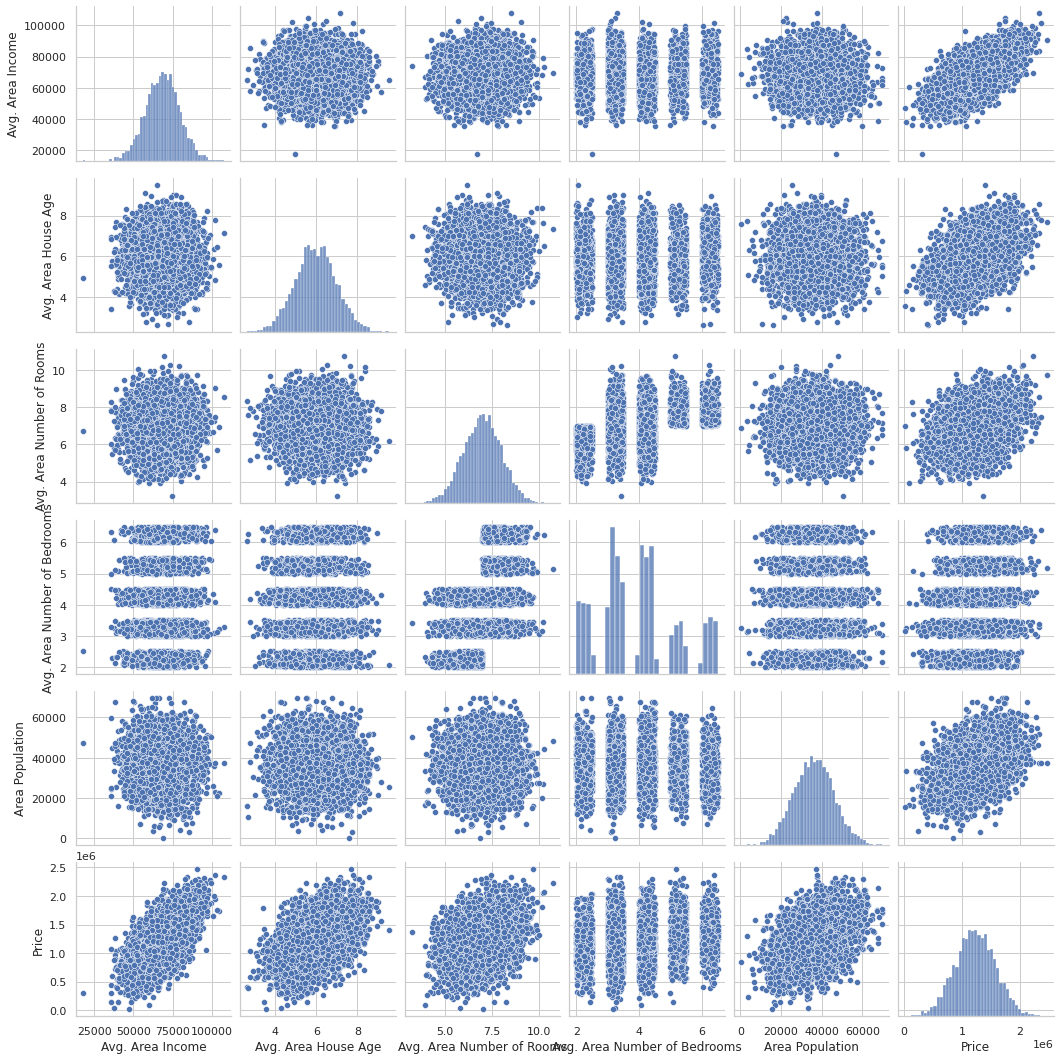

In [7]:
sns.set_theme(style="whitegrid")
sns.pairplot(df)

<AxesSubplot:>

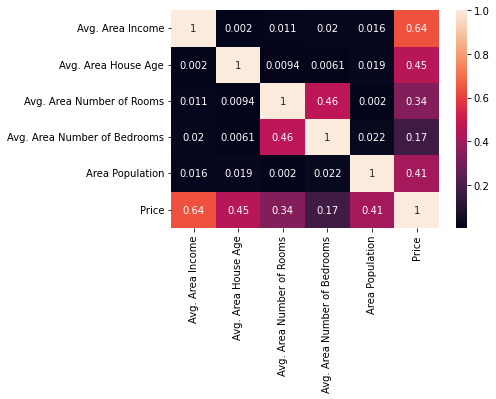

In [6]:
sns.heatmap(abs(df.corr()),annot=True)

In [7]:
Y=df["Price"]

In [8]:
Y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [10]:
X = df.drop(["Address","Price"],axis=1)

In [11]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=100)

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train,Y_train)

LinearRegression()

In [16]:
print(lr.intercept_)

-2632015.912070278


In [17]:
lr.coef_

array([2.14377564e+01, 1.66072469e+05, 1.20593183e+05, 1.13679220e+03,
       1.53277084e+01])

In [18]:
cfe = pd.DataFrame(data = lr.coef_ , index = X_train.columns , columns = ["Coeff"])

In [19]:
cfe

,Coeff
Avg. Area Income,21.437756
Avg. Area House Age,166072.468652
Avg. Area Number of Rooms,120593.183329
Avg. Area Number of Bedrooms,1136.792202
Area Population,15.327708


In [20]:
predictions = lr.predict(X_test)

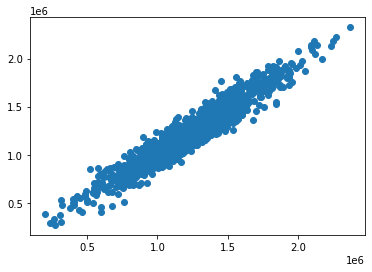

In [21]:
plt.scatter(Y_test,predictions)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

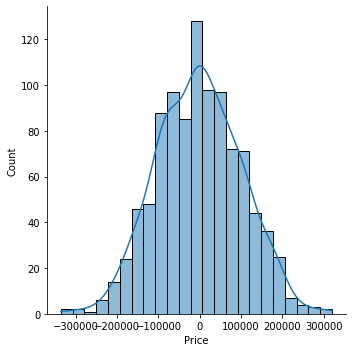

In [22]:
sns.displot((Y_test-predictions),kde=True)
plt.tight_layout

# MODEL EVALUTION

In [23]:
from sklearn import metrics

In [24]:
metrics.mean_absolute_error(Y_test,predictions)

81758.98219476981

In [25]:
metrics.mean_squared_error(Y_test,predictions)

10366319820.242863

In [26]:
np.sqrt(metrics.mean_squared_error(Y_test,predictions))

101815.12569477515